# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [6]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data.head()

,transcript,total_words
Amos,the words of amos who was among the herdmen o...,38376
Chronicles,adam seth enosh kenan mahalalel jared enoc...,32707
Daniel,in the third year of the reign of jehoiakim k...,24312
Deuteronomy,these are the words which moses spoke unto al...,32656
Ecclesiastes,the words of koheleth the son of david king i...,28595


In [4]:
!pip install textblob

  Using cached https://files.pythonhosted.org/packages/60/f0/1d9bfcc8ee6b83472ec571406bd0dd51c0e6330ff1a51b2d29861d389e85/textblob-0.15.3-py2.py3-none-any.whl


In [ ]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)

In [11]:
data = data.sort_values('polarity')

In [14]:
# most negative
data.head()

,transcript,total_words,polarity,subjectivity
Habakkuk,the burden which habakkuk the prophet did see...,42851,-0.053096,0.575699
Zephaniah,the word of the lord which came unto zephania...,18127,-0.005205,0.523372
Nahum,the burden of nineveh the book of the vision ...,43655,0.007016,0.526173
Jeremiah,the words of jeremiah the son of hilkiah of t...,4166,0.021053,0.543083
Lamentations,how doth the city sit solitary that was full ...,1131,0.035364,0.497140


In [15]:
# most positive
data.tail()

,transcript,total_words,polarity,subjectivity
Ecclesiastes,the words of koheleth the son of david king i...,28595,0.165814,0.594968
Hosea,the word of the lord that came unto hosea the...,5193,0.166672,0.550206
Esther,now it came to pass in the days of ahasuerust...,19046,0.188226,0.461492
Daniel,in the third year of the reign of jehoiakim k...,24312,0.190240,0.513033
SongofSongs,the song of songs which is solomons let him k...,5713,0.380491,0.690187


In [16]:
data = data.sort_values('subjectivity')

In [17]:
# most negative
data.head()

,transcript,total_words,polarity,subjectivity
Haggai,in the second year of darius the king in the ...,39517,0.072035,0.335736
Numbers,and the lord spoke unto moses in the wilderne...,18254,0.121011,0.400019
Ruth,and it came to pass in the days when the judg...,5622,0.078018,0.402952
EzraNehemiah,e now in the first year of cyrus king of pers...,48206,0.145148,0.450502
Exodus,now these are the names of the sons of israel...,18975,0.083668,0.452363


In [18]:
# most positive
data.tail()

,transcript,total_words,polarity,subjectivity
Ecclesiastes,the words of koheleth the son of david king i...,28595,0.165814,0.594968
Malachi,the burden of the word of the lord to israel ...,1780,0.159127,0.624686
Jonah,now the word of the lord came unto jonah the ...,3170,0.058634,0.645122
Proverbs,the proverbs of solomon the son of david king...,2558,0.116124,0.650707
SongofSongs,the song of songs which is solomons let him k...,5713,0.380491,0.690187


In [24]:
data['book'] = data.index
data.head()

,transcript,total_words,polarity,subjectivity,book
Haggai,in the second year of darius the king in the ...,39517,0.072035,0.335736,Haggai
Numbers,and the lord spoke unto moses in the wilderne...,18254,0.121011,0.400019,Numbers
Ruth,and it came to pass in the days when the judg...,5622,0.078018,0.402952,Ruth
EzraNehemiah,e now in the first year of cyrus king of pers...,48206,0.145148,0.450502,EzraNehemiah
Exodus,now these are the names of the sons of israel...,18975,0.083668,0.452363,Exodus


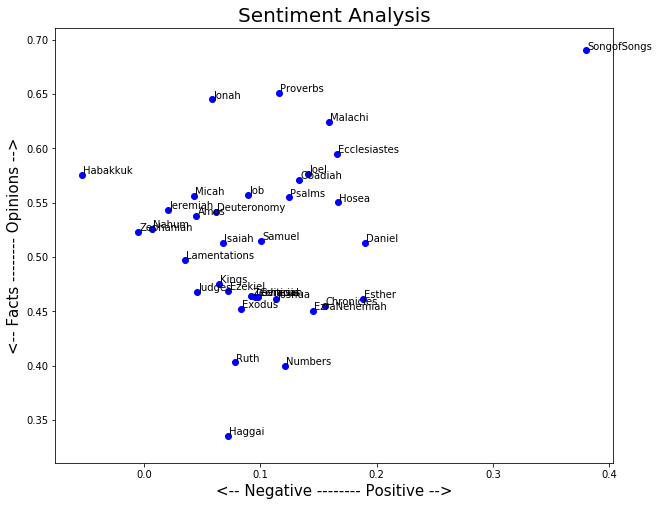

In [27]:
# Let's plot the results
import matplotlib.pyplot as plt

# plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['book'][index], fontsize=10)
#     plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [94]:
# Split each routine into 10 parts
import numpy as np
import math
pieces = 5
def split_text(text, n=pieces):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''
#     total_words = text.split()
#     if len(total_words) > 500:
#         n = math.ceil(total_words/500)
    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [95]:
# Let's take a look at our data again
data.sample(10)

,transcript,total_words,polarity,subjectivity,book
Judges,and it came to pass after the death of joshua...,1459,0.045771,0.467918,Judges
Samuel,now there was a certain man of ramathaimzoph...,3515,0.101078,0.514906,Samuel
Haggai,in the second year of darius the king in the ...,39517,0.072035,0.335736,Haggai
Micah,the word of the lord that came to micah the m...,46804,0.043223,0.556489,Micah
Habakkuk,the burden which habakkuk the prophet did see...,42851,-0.053096,0.575699,Habakkuk
Zephaniah,the word of the lord which came unto zephania...,18127,-0.005205,0.523372,Zephaniah
Amos,the words of amos who was among the herdmen o...,38376,0.045110,0.538163,Amos
Chronicles,adam seth enosh kenan mahalalel jared enoc...,32707,0.155459,0.455225,Chronicles
Esther,now it came to pass in the days of ahasuerust...,19046,0.188226,0.461492,Esther
Lamentations,how doth the city sit solitary that was full ...,1131,0.035364,0.497140,Lamentations


In [96]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[[' in the second year of darius the king in the sixth month in the first day of the month came the word of the lord by haggai the prophet unto zerubbabel the son of shealtiel governor of judah and to joshua the son of jehozadak the high priest saying thus speaketh the lord of hosts saying this people say the time is not come the time that the lords house should be built  then came the word of the lord by haggai the prophet saying is it a time for you yourselves to dwell in your cieled houses while this house lieth waste now therefore thus saith the lord of hosts consider your ways ye have sown much and brought in little ye eat but ye have not enough ye drink but ye are not filled with drink ye clothe you but there is none warm and he that earneth wages earneth wages for a bag with holes  thus saith the lord of hosts consider your ways go up to the hillcountry and bring wood and build the house and i will take pleasure in it and i will be glorified saith the lord ye looked for much and

In [97]:
# The list has 10 elements, one for each transcript
len(list_pieces)

35

In [98]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

5

In [99]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.05772727272727273,
  0.12,
  0.12416666666666666,
  0.049999999999999996,
  -0.11851851851851854],
 [0.10710814204191682,
  0.12618566109032225,
  0.11704119113210024,
  0.1561319236319238,
  0.08794390637610974],
 [0.09209183673469389,
  0.06978174603174606,
  0.10049019607843138,
  0.0018518518518518443,
  0.16216931216931219],
 [0.25788883735312307,
  0.15310776942355886,
  0.06397282554610138,
  0.16717018206379908,
  0.1490977118119975],
 [0.046751871530632566,
  0.0803926034283177,
  0.09157465682465687,
  0.0976779829942481,
  0.08757282420161205],
 [0.12344943310657598,
  0.198368881868882,
  0.22088899393497105,
  0.09851217675622455,
  0.13628147000306085],
 [0.1717628555245379,
  0.12665095691794728,
  0.10346666666666667,
  0.08484410430839003,
  0.07262810898637667],
 [0.2999446290143964,
  0.18274943310657593,
  0.18418434343434342,
  0.08743968253968255,
  0.1376780626780627],
 [0.1775273436003524,
  0.10577292982518408,
  0.15147055678469304,
  0.03968141233766234,


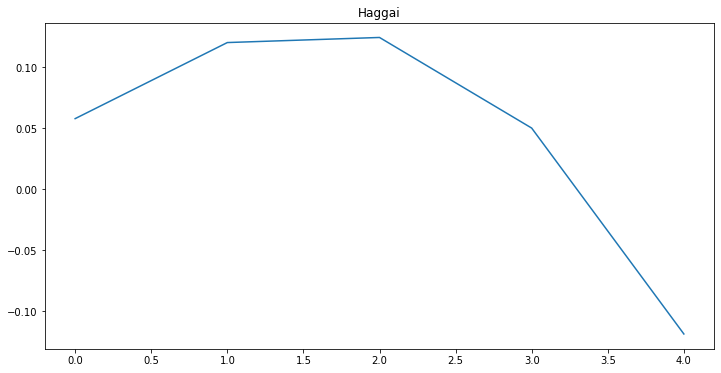

In [100]:
# Show the plot for one comedian
plt.rcParams['figure.figsize'] = [12, 6]

plt.plot(polarity_transcript[0])
plt.title(data['book'].index[0])
plt.show()

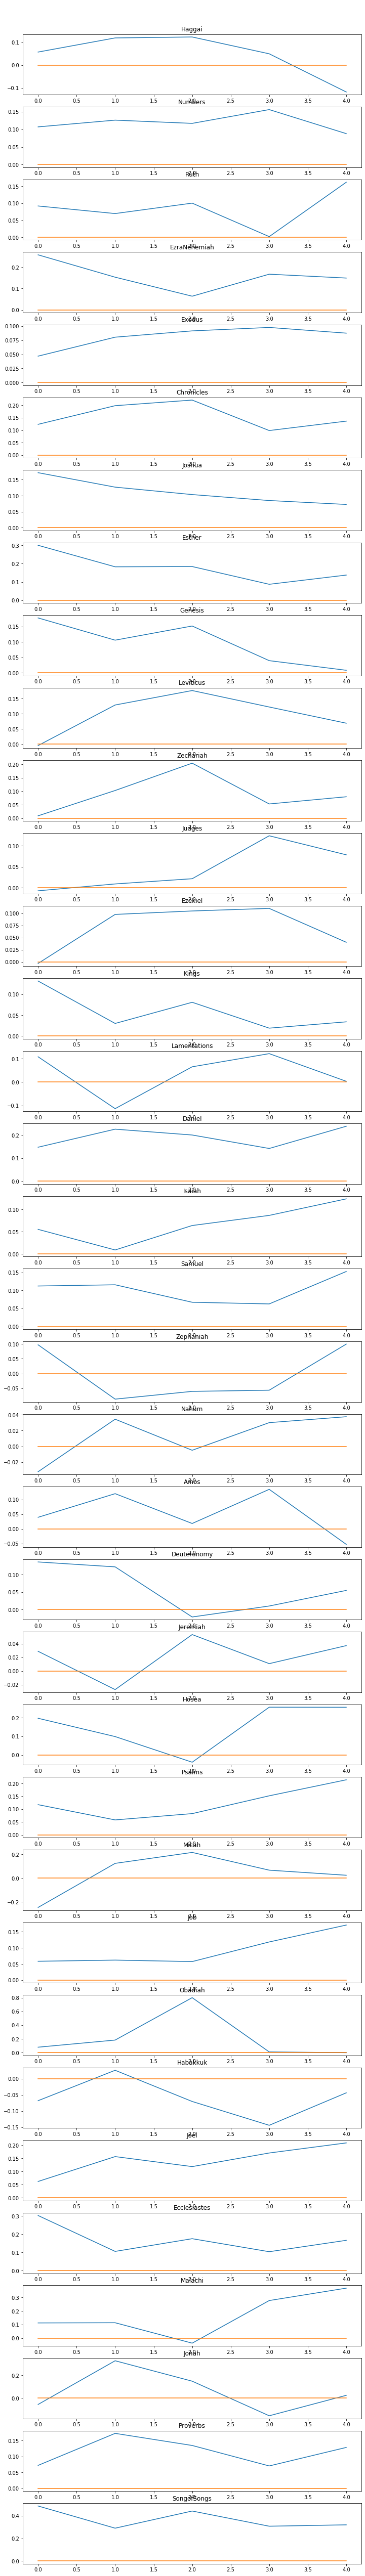

In [104]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [12, 92]

for index, comedian in enumerate(data.index):    
    plt.subplot(35, 1, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,pieces), np.zeros(pieces))
    plt.title('\n\n\n'+data['book'][index])
#     plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

Ali Wong stays generally positive throughout her routine. Similar comedians are Louis C.K. and Mike Birbiglia.

On the other hand, you have some pretty different patterns here like Bo Burnham who gets happier as time passes and Dave Chappelle who has some pretty down moments in his routine.

## Additional Exercises

1. Modify the number of sections the comedy routine is split into and see how the charts over time change.